In [1]:
!pip3 install --upgrade matplotlib --user

You should consider upgrading via the 'c:\users\annjo\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
#!pip install matplotlib==3.4.1
import matplotlib
matplotlib.__version__

'3.6.2'

In [3]:
# MODULARIZE IT
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

f1 = open('trajectories/player_1/HA/g1.json')
f2 = open('trajectories/player_2/HA/g1.json')
f3 = open('trajectories/player_3/HA/g1.json')
f4 = open('trajectories/player_4/HA/g1.json')
f5 = open('trajectories/player_5/HA/g1.json')

f6 = open('trajectories/player_1/SP/g1.json')
f7 = open('trajectories/player_2/SP/g1.json')
f8 = open('trajectories/player_3/SP/g1.json')
f9 = open('trajectories/player_4/SP/g1.json')
f10 = open('trajectories/player_5/SP/g1.json')

f11 = open('trajectories/player_1/PB/g1.json')
f12 = open('trajectories/player_2/PB/g1.json')
f13 = open('trajectories/player_3/PB/g1.json')
f14 = open('trajectories/player_4/PB/g1.json')
f15 = open('trajectories/player_5/PB/g1.json')

f16 = open('trajectories/player_1/PB/g2.json')
f17 = open('trajectories/player_2/PB/g2.json')
f18 = open('trajectories/player_3/PB/g2.json')
f19 = open('trajectories/player_4/PB/g2.json')
f20= open('trajectories/player_5/PB/g2.json')

data1 = json.load(f1)
data2 = json.load(f2)
data3 = json.load(f3)
data4 = json.load(f4)
data5 = json.load(f5)
data6 = json.load(f6)
data7 = json.load(f7)
data8 = json.load(f8)
data9 = json.load(f9)
data10 = json.load(f10)
data11 = json.load(f11)
data12 = json.load(f12)
data13 = json.load(f13)
data14 = json.load(f14)
data15 = json.load(f15)
data16 = json.load(f16)
data17= json.load(f17)
data18 = json.load(f18)
data19 = json.load(f19)
data20 = json.load(f20)

In [4]:
df_ep_obs_p1 = pd.json_normalize(data1['ep_observations'][0])
df_ep_obs_p2 = pd.json_normalize(data2['ep_observations'][0])
df_ep_obs_p3 = pd.json_normalize(data3['ep_observations'][0])
df_ep_obs_p4 = pd.json_normalize(data4['ep_observations'][0])
df_ep_obs_p5 = pd.json_normalize(data5['ep_observations'][0])
df_ep_obs_p6 = pd.json_normalize(data6['ep_observations'][0])
df_ep_obs_p7 = pd.json_normalize(data7['ep_observations'][0])
df_ep_obs_p8 = pd.json_normalize(data8['ep_observations'][0])
df_ep_obs_p9 = pd.json_normalize(data9['ep_observations'][0])
df_ep_obs_p10 = pd.json_normalize(data10['ep_observations'][0])
df_ep_obs_p11 = pd.json_normalize(data11['ep_observations'][0])
df_ep_obs_p12 = pd.json_normalize(data12['ep_observations'][0])
df_ep_obs_p13 = pd.json_normalize(data13['ep_observations'][0])
df_ep_obs_p14 = pd.json_normalize(data14['ep_observations'][0])
df_ep_obs_p15 = pd.json_normalize(data15['ep_observations'][0])
df_ep_obs_p16 = pd.json_normalize(data16['ep_observations'][0])
df_ep_obs_p17 = pd.json_normalize(data17['ep_observations'][0])
df_ep_obs_p18 = pd.json_normalize(data18['ep_observations'][0])
df_ep_obs_p19 = pd.json_normalize(data19['ep_observations'][0])
df_ep_obs_p20 = pd.json_normalize(data20['ep_observations'][0])


In [5]:
len(df_ep_obs_p5)

804

In [6]:
def clean(df_ep_obs, data):
    df_ep_obs['agent_pos'] = df_ep_obs["players"].apply(lambda x: x[0]["position"])
    df_ep_obs['agent_ori'] = df_ep_obs["players"].apply(lambda x: x[0]["orientation"])
    df_ep_obs['agent_heldobj_name'] = df_ep_obs["players"].apply(lambda x: x[0]["held_object"]["name"] if 'held_object' in x[0].keys() else None)
    df_ep_obs['agent_heldobj_pos'] = df_ep_obs["players"].apply(lambda x: x[0]["held_object"]["position"] if 'held_object' in x[0].keys() else None)
    df_ep_obs['human_pos'] = df_ep_obs["players"].apply(lambda x: x[1]["position"])
    df_ep_obs['human_ori'] = df_ep_obs["players"].apply(lambda x: x[1]["orientation"])
    df_ep_obs['human_heldobj_name'] = df_ep_obs["players"].apply(lambda x: x[1]["held_object"]["name"] if 'held_object' in x[1].keys() else None)
    df_ep_obs['human_heldobj_pos'] = df_ep_obs["players"].apply(lambda x: x[1]["held_object"]["position"] if 'held_object' in x[1].keys() else None)
    df_ep_obs["score"]=data["ep_rewards"][0]
    df_ep_obs['agent_served_soups'] =  (df_ep_obs['agent_heldobj_name']=='soup') & (df_ep_obs["score"]==20)
    df_ep_obs['agent_served_soups'] =  df_ep_obs['agent_served_soups'].apply(lambda x: 1 if x==True else 0)
    df_ep_obs['human_served_soups'] =  (df_ep_obs['human_heldobj_name']=='soup') & (df_ep_obs["score"]==20)
    df_ep_obs['human_served_soups'] =  df_ep_obs['human_served_soups'].apply(lambda x: 1 if x==True else 0)
    df_ep_obs.drop(columns=['players','order_list'])
    return df_ep_obs

In [7]:
df_p1 = clean(df_ep_obs_p1, data1)
df_p2 = clean(df_ep_obs_p2, data2)
df_p3 = clean(df_ep_obs_p3, data3)
df_p4 = clean(df_ep_obs_p4, data4)
df_p5 = clean(df_ep_obs_p5, data5)
df_p6 = clean(df_ep_obs_p6, data6)
df_p7 = clean(df_ep_obs_p7, data7)
df_p8 = clean(df_ep_obs_p8, data8)
df_p9 = clean(df_ep_obs_p9, data9)
df_p10 = clean(df_ep_obs_p10, data10)
df_p11 = clean(df_ep_obs_p11, data11)
df_p12 = clean(df_ep_obs_p12, data12)
df_p13 = clean(df_ep_obs_p13, data13)
df_p14 = clean(df_ep_obs_p14, data14)
df_p15 = clean(df_ep_obs_p15, data15)
df_p16 = clean(df_ep_obs_p16, data16)
df_p17 = clean(df_ep_obs_p17, data17)
df_p18 = clean(df_ep_obs_p18, data18)
df_p19 = clean(df_ep_obs_p19, data19)
df_p20 = clean(df_ep_obs_p20, data20)

In [8]:
p1_agent_soups = df_p1[(df_p1["agent_heldobj_name"]=='soup') & (df_p1["score"]==20)].shape[0]
p1_human_soups = df_p1[(df_p1["human_heldobj_name"]=='soup') & (df_p1["score"]==20)].shape[0]
p2_agent_soups = df_p2[(df_p2["agent_heldobj_name"]=='soup') & (df_p2["score"]==20)].shape[0]
p2_human_soups = df_p2[(df_p2["human_heldobj_name"]=='soup') & (df_p2["score"]==20)].shape[0]
p3_agent_soups = df_p3[(df_p3["agent_heldobj_name"]=='soup') & (df_p3["score"]==20)].shape[0]
p3_human_soups = df_p3[(df_p3["human_heldobj_name"]=='soup') & (df_p3["score"]==20)].shape[0]
p4_agent_soups = df_p4[(df_p4["agent_heldobj_name"]=='soup') & (df_p4["score"]==20)].shape[0]
p4_human_soups = df_p4[(df_p4["human_heldobj_name"]=='soup') & (df_p4["score"]==20)].shape[0]
p5_agent_soups = df_p5[(df_p5["agent_heldobj_name"]=='soup') & (df_p5["score"]==20)].shape[0]
p5_human_soups = df_p5[(df_p5["human_heldobj_name"]=='soup') & (df_p5["score"]==20)].shape[0]

l1=[p1_agent_soups, p2_agent_soups, p3_agent_soups, p4_agent_soups, p5_agent_soups]
l2=[p1_human_soups, p2_human_soups, p3_human_soups, p4_human_soups, p5_human_soups]

p6_agent_soups = df_p6[(df_p6["agent_heldobj_name"]=='soup') & (df_p6["score"]==20)].shape[0]
p6_human_soups = df_p6[(df_p6["human_heldobj_name"]=='soup') & (df_p6["score"]==20)].shape[0]
p7_agent_soups = df_p7[(df_p7["agent_heldobj_name"]=='soup') & (df_p7["score"]==20)].shape[0]
p7_human_soups = df_p7[(df_p7["human_heldobj_name"]=='soup') & (df_p7["score"]==20)].shape[0]
p8_agent_soups = df_p8[(df_p8["agent_heldobj_name"]=='soup') & (df_p8["score"]==20)].shape[0]
p8_human_soups = df_p8[(df_p8["human_heldobj_name"]=='soup') & (df_p8["score"]==20)].shape[0]
p9_agent_soups = df_p9[(df_p9["agent_heldobj_name"]=='soup') & (df_p9["score"]==20)].shape[0]
p9_human_soups = df_p9[(df_p9["human_heldobj_name"]=='soup') & (df_p9["score"]==20)].shape[0]
p10_agent_soups = df_p10[(df_p10["agent_heldobj_name"]=='soup') & (df_p10["score"]==20)].shape[0]
p10_human_soups = df_p10[(df_p10["human_heldobj_name"]=='soup') & (df_p10["score"]==20)].shape[0]

l3=[p6_agent_soups, p7_agent_soups, p8_agent_soups, p9_agent_soups, p10_agent_soups]
l4=[p6_human_soups, p7_human_soups, p8_human_soups, p9_human_soups, p10_human_soups]

p11_agent_soups = df_p11[(df_p11["agent_heldobj_name"]=='soup') & (df_p11["score"]==20)].shape[0]
p11_human_soups = df_p11[(df_p11["human_heldobj_name"]=='soup') & (df_p11["score"]==20)].shape[0]
p12_agent_soups = df_p12[(df_p12["agent_heldobj_name"]=='soup') & (df_p12["score"]==20)].shape[0]
p12_human_soups = df_p12[(df_p12["human_heldobj_name"]=='soup') & (df_p12["score"]==20)].shape[0]
p13_agent_soups = df_p13[(df_p13["agent_heldobj_name"]=='soup') & (df_p13["score"]==20)].shape[0]
p13_human_soups = df_p13[(df_p13["human_heldobj_name"]=='soup') & (df_p13["score"]==20)].shape[0]
p14_agent_soups = df_p14[(df_p14["agent_heldobj_name"]=='soup') & (df_p14["score"]==20)].shape[0]
p14_human_soups = df_p14[(df_p14["human_heldobj_name"]=='soup') & (df_p14["score"]==20)].shape[0]
p15_agent_soups = df_p15[(df_p15["agent_heldobj_name"]=='soup') & (df_p15["score"]==20)].shape[0]
p15_human_soups = df_p15[(df_p15["human_heldobj_name"]=='soup') & (df_p15["score"]==20)].shape[0]

l5=[p11_agent_soups, p12_agent_soups, p13_agent_soups, p14_agent_soups, p15_agent_soups]
l6=[p11_human_soups, p12_human_soups, p13_human_soups, p14_human_soups, p15_human_soups]

p16_agent_soups = df_p16[(df_p16["agent_heldobj_name"]=='soup') & (df_p16["score"]==20)].shape[0]
p16_human_soups = df_p16[(df_p16["human_heldobj_name"]=='soup') & (df_p16["score"]==20)].shape[0]
p17_agent_soups = df_p17[(df_p17["agent_heldobj_name"]=='soup') & (df_p17["score"]==20)].shape[0]
p17_human_soups = df_p17[(df_p17["human_heldobj_name"]=='soup') & (df_p17["score"]==20)].shape[0]
p18_agent_soups = df_p18[(df_p18["agent_heldobj_name"]=='soup') & (df_p18["score"]==20)].shape[0]
p18_human_soups = df_p18[(df_p18["human_heldobj_name"]=='soup') & (df_p18["score"]==20)].shape[0]
p19_agent_soups = df_p19[(df_p19["agent_heldobj_name"]=='soup') & (df_p19["score"]==20)].shape[0]
p19_human_soups = df_p19[(df_p19["human_heldobj_name"]=='soup') & (df_p19["score"]==20)].shape[0]
p20_agent_soups = df_p20[(df_p20["agent_heldobj_name"]=='soup') & (df_p20["score"]==20)].shape[0]
p20_human_soups = df_p20[(df_p20["human_heldobj_name"]=='soup') & (df_p20["score"]==20)].shape[0]

l7=[p16_agent_soups, p17_agent_soups, p18_agent_soups, p19_agent_soups, p20_agent_soups]
l8=[p16_human_soups, p17_human_soups, p18_human_soups, p19_human_soups, p20_human_soups]

'''print("Player 1: Number of soups plated by agent: ",p1_agent_soups)
print("Player 1: Number of soups plated by human: ",p1_human_soups)
print("Player 2: Number of soups plated by agent: ",p2_agent_soups)
print("Player 2: Number of soups plated by human: ",p1_human_soups)
print("Player 3: Number of soups plated by agent: ",p3_agent_soups)
print("Player 3: Number of soups plated by human: ",)
print("Player 4: Number of soups plated by agent: ",p4_agent_soups)
print("Player 4: Number of soups plated by human: ",)
print("Player 5: Number of soups plated by agent: ",p5_agent_soups)
print("Player 5: Number of soups plated by human: ",)
'''

'print("Player 1: Number of soups plated by agent: ",p1_agent_soups)\nprint("Player 1: Number of soups plated by human: ",p1_human_soups)\nprint("Player 2: Number of soups plated by agent: ",p2_agent_soups)\nprint("Player 2: Number of soups plated by human: ",p1_human_soups)\nprint("Player 3: Number of soups plated by agent: ",p3_agent_soups)\nprint("Player 3: Number of soups plated by human: ",)\nprint("Player 4: Number of soups plated by agent: ",p4_agent_soups)\nprint("Player 4: Number of soups plated by human: ",)\nprint("Player 5: Number of soups plated by agent: ",p5_agent_soups)\nprint("Player 5: Number of soups plated by human: ",)\n'

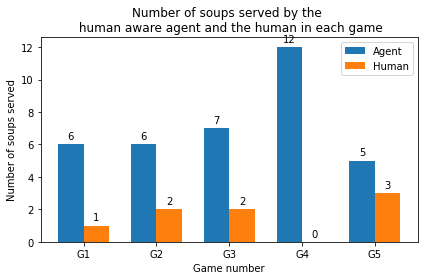

In [9]:
# Human Aware
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, l1, width, label='Agent')
rects2 = ax.bar(x + width/2, l2, width, label='Human')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Game number')
ax.set_ylabel('Number of soups served')
ax.set_title('Number of soups served by the \n human aware agent and the human in each game')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.savefig('HumanAwareSoupServes.png')
plt.show()

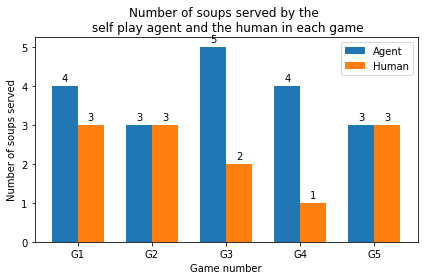

In [10]:
# Self Play
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, l3, width, label='Agent')
rects2 = ax.bar(x + width/2, l4, width, label='Human')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Game number')
ax.set_ylabel('Number of soups served')
ax.set_title('Number of soups served by the \n self play agent and the human in each game')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.savefig('SelfPlaySoupServes.png')
plt.show()

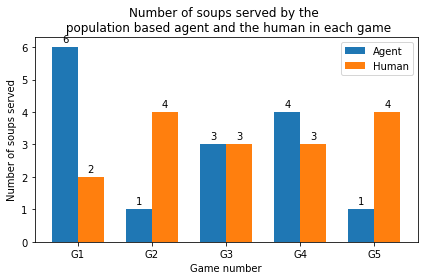

In [11]:
# Population Based
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, l5, width, label='Agent')
rects2 = ax.bar(x + width/2, l6, width, label='Human')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Game number')
ax.set_ylabel('Number of soups served')
ax.set_title('Number of soups served by the \n population based agent and the human in each game')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.savefig('PopulationBasedSoupServes.png')
plt.show()

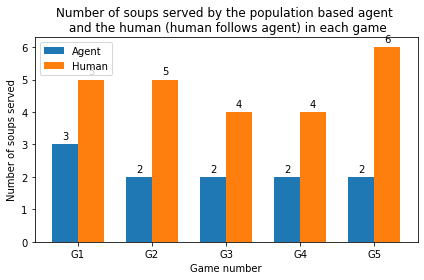

In [12]:
# Population Based and Following
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, l7, width, label='Agent')
rects2 = ax.bar(x + width/2, l8, width, label='Human')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Game number')
ax.set_ylabel('Number of soups served')
ax.set_title('Number of soups served by the population based agent \n and the human (human follows agent) in each game')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.savefig('PBfollowSoupServes.png')
plt.show()

In [13]:
def diff(a, b):
    if isinstance(a, list):
        return [a[0] - b[0], a[1]-b[1]]
    return None
def create_blocking_feature(df_ep_obs):
    df_ep_obs['agent_lead_pos'] = df_ep_obs['agent_pos'].shift(-1)
    df_ep_obs['human_lead_pos'] = df_ep_obs['human_pos'].shift(-1)
    df_ep_obs['diff_agent_pos'] = df_ep_obs.apply(lambda x: diff(x['agent_lead_pos'], x['agent_pos']), axis=1)
    df_ep_obs['diff_human_pos'] = df_ep_obs.apply(lambda x: diff(x['human_lead_pos'], x['human_pos']), axis=1)
    df_ep_obs['diff_agent_human_pos'] = df_ep_obs.apply(lambda x: diff(x['agent_pos'], x['human_pos']), axis=1)
    df_ep_obs['lead_diff_agent_human_pos'] = df_ep_obs['diff_agent_human_pos'].shift(-1)
    df_ep_obs['agent_human_pos'] = df_ep_obs.apply(lambda x: diff(x['lead_diff_agent_human_pos'], x['diff_agent_human_pos']), axis=1)
    # creating blocking feature
    df_ep_obs['blocking1'] = df_ep_obs["agent_human_pos"].apply(lambda x: 1 if x==[0,0] else 0)
    df_ep_obs['blocking2'] = df_ep_obs["diff_agent_pos"].apply(lambda x: 1 if x in [[-1,0],[0,-1],[1,0],[0,1]] else 0)
    df_ep_obs["blocking"] = df_ep_obs["blocking1"] & df_ep_obs["blocking2"]
    df_ep_obs["timestep"]=pd.Series(range(0,804))
    return df_ep_obs

In [14]:
df_p1 = create_blocking_feature(df_p1)
df_p2 = create_blocking_feature(df_p2)
df_p3 = create_blocking_feature(df_p3)
df_p4 = create_blocking_feature(df_p4)
df_p5 = create_blocking_feature(df_p5)

df_p6 = create_blocking_feature(df_p6)
df_p7 = create_blocking_feature(df_p7)
df_p8 = create_blocking_feature(df_p8)
df_p9 = create_blocking_feature(df_p9)
df_p10 = create_blocking_feature(df_p10)

df_p11 = create_blocking_feature(df_p11)
df_p12 = create_blocking_feature(df_p12)
df_p13 = create_blocking_feature(df_p13)
df_p14 = create_blocking_feature(df_p14)
df_p15 = create_blocking_feature(df_p15)

df_p16 = create_blocking_feature(df_p16)
df_p17 = create_blocking_feature(df_p17)
df_p18 = create_blocking_feature(df_p18)
df_p19 = create_blocking_feature(df_p19)
df_p20 = create_blocking_feature(df_p20)

# SOM

In [15]:
!pip install minisom

You should consider upgrading via the 'c:\users\annjo\anaconda3\python.exe -m pip install --upgrade pip' command.


In [29]:
from matplotlib.patches import Patch
%matplotlib inline

from minisom import MiniSom
from sklearn.preprocessing import minmax_scale, scale
feature_names = ['score', 'blocking', 'human_served_soups', 'agent_served_soups']
frames = [df_p1, df_p2, df_p3, df_p4, df_p5, df_p6, df_p7, df_p8, df_p9, df_p10, df_p11, df_p12, df_p13, df_p14, df_p15, df_p16, df_p17, df_p18, df_p19, df_p20]

result = pd.concat(frames)

X = result[feature_names].values
X = scale(X)

size = 15
som = MiniSom(size, size, len(X[0]),
              neighborhood_function='gaussian', sigma=10,
              random_seed=1)

som.pca_weights_init(X)
som.train_random(X, 1000, verbose=True)

 [  995 / 1000 ] 100% - 0:00:00 left 

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.10233900155314662


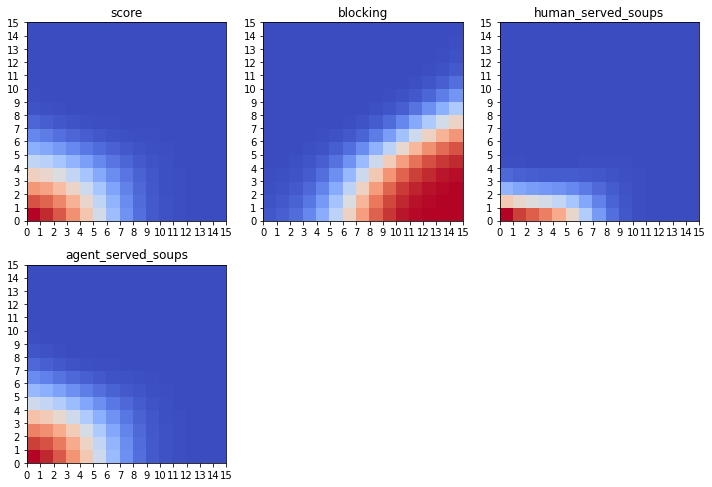

In [30]:
W = som.get_weights()
plt.figure(figsize=(10, 10))
for i, f in enumerate(feature_names):
    plt.subplot(3, 3, i+1)
    plt.title(f)
    plt.pcolor(W[:,:,i].T, cmap='coolwarm')
    plt.xticks(np.arange(size+1))
    plt.yticks(np.arange(size+1))
plt.tight_layout()
plt.savefig("SOM.png")
plt.show()